In [1]:
import pandas as pd
import re 
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
import os
from nltk.tokenize import word_tokenize
import emoji

C:\Anaconda\envs\uni\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py').read())

demoji.download_codes()

C:\Anaconda\envs\uni\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
... OK (Got response in 0.44 seconds)
Writing emoji data to C:\Users\home\.demoji\codes.json ...
... OK
[nltk_data] Downloading package stopwords to
[nltk_data]     

In [4]:
df = pickle.load(open('data_n_models/one_cleaned_df.pkl', "rb"))
eng_df = df[df.language == 'en'].reset_index()
eng_df.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,zalando,en
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,zalando,en
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,zalando,en
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,zalando,en
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,zalando,en


In [31]:
print(STOPWORDS)

frozenset({'really', 'mine', 'hereby', 'didn', 'everything', 'in', 'on', 'down', 'does', 'however', 'none', 'otherwise', 'full', 'done', 'much', 'show', 'fifteen', 'whoever', 'few', 'very', 'almost', 'thence', 'amongst', 'of', 'still', 'seeming', 'neither', 'could', 'why', 'something', 'thus', 'make', 'say', 'thru', 'when', 'three', 'meanwhile', 'until', 'himself', 'please', 'nobody', 'someone', 'myself', 'give', 'bottom', 'eight', 'every', 'both', 'anyone', 'namely', 'no', 'keep', 'or', 'who', 'these', 'a', 'the', 'don', 'may', 'doing', 'without', 'might', 'front', 'are', 'you', 'elsewhere', 'becoming', 'must', 'there', 'regarding', 'empty', 'take', 'sixty', 'we', 'own', 'seemed', 'below', 'else', 'becomes', 'together', 'whether', 'by', 'among', 'whence', 'whereby', 'con', 'found', 'as', 'such', 'will', 'around', 'indeed', 'here', 'less', 'somewhere', 'its', 'out', 'thin', 'our', 'rather', 'moreover', 'is', 'they', 'side', 'beforehand', 'up', 'being', 'after', 'sometime', 'hereupon', 

# Filter out companies` tweets
There are some tweets that posted by companies themselves. In order to not take them into account we have to filter them out

In [5]:
#collect all the names related to companies as well as bots and scripts
names = []
pat = r'(zalando|asos|boohoo|MidwestWeather3|Proxy4Sure)'
for name in eng_df.name.unique():
    match = re.findall(pat, name, re.IGNORECASE) 
    if len(match) > 0:
        names.append(name)
names

['MidwestWeather3',
 'ASOS',
 'Asos_m115',
 'asos_order',
 'asos_assyla',
 'asos_askari',
 'ASOS_Careers',
 'nauj_asos',
 'zalando_uk',
 'Zalando_NL',
 'Zalando',
 'ZalandoTech',
 'Zalando_Press',
 'Proxy4Sure',
 'Asos_Julia',
 '__asoS',
 'ASOS_NickB',
 'ASOS_again',
 'ZalandoA',
 'ASOS_HeretoHelp',
 'boohoo_cshelp',
 'BooHoo_Lili',
 'Boohoo_Cracker_',
 'boohoo',
 'BOOHOO_ABI',
 'Boohoo_DAN',
 'boohoo_zoo',
 'cracker_boohoo',
 'asos_zhanna',
 'boohooMAN',
 'boohoo_h',
 'JAI_BOOHOO',
 'ServiceZalando',
 'boohooSam_',
 'Carpet_asos',
 'boohooUSA',
 'kosto_asos',
 'Asos_Rocky',
 'KaraBoohoo',
 'icy_boohoo',
 'zalandofi',
 '____boohoo',
 'boohoo_tear',
 'karthik_asos',
 'agent_asos',
 'boohooAus']

In [6]:
#check how much data left
print(eng_df.shape)
eng_df.drop(eng_df[eng_df.name.isin(names)].index).shape

(106575, 14)


(100829, 14)

In [7]:
#filter out the dataframe
eng_df = eng_df.drop(eng_df[eng_df.name.isin(names)].index)

# Duplicated tweets
Theoretically, people can post the same tweets multiple times and retweet others tweets (so that there is the same tweet text). In order to get rid of too much duplicates and to keep retweets, we keep only tweets with unique combination of text, date and account name

In [8]:
#check for tweets duplicates
eng_df.tweet.value_counts()

Save up to 20% on ASOS https://t.co/FcTX4ytmzB #fashion                                                                                                                                                                                                                                     30
@ASOS This account is all about positive vibes when in reality customers are being treated horribly. My parcel got delivered to wrong address and guess what, CS wished me a wonderful day after saying im not being refunded. Scam                                                         28
BOOHOO - - new clothes collection https://t.co/cRSIkKE0Ac                                                                                                                                                                                                                                   26
boohoo cracker                                                                                                                             

In [9]:
#filtering out tweets duplicates
eng_df = eng_df.drop_duplicates(subset=['tweet','name','created'])

In [10]:
#check for tweets duplicates
eng_df.tweet.value_counts()

Save up to 20% on ASOS https://t.co/FcTX4ytmzB #fashion                                                                                                                                20
BOOHOO - - new clothes collection https://t.co/cRSIkKE0Ac                                                                                                                              19
boohoo cracker                                                                                                                                                                         15
BOOHOO MEN - new clothes collection https://t.co/VjNBRtmxRO                                                                                                                            14
Check out this listing I just added to my #Poshmark closet: ASOS leopard print pumps. https://t.co/aNiyKWLkzb #shopmycloset @poshmarkapp                                               12
                                                                      

In [15]:
eng_df[eng_df.tweet == 'BOOHOO - - new clothes collection https://t.co/cRSIkKE0Ac']

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language
31873,234,3317203561,5176,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,18-Mar-2021,73,False,0.0,NaN,boohoo,en
33041,1402,3317203561,5176,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,17-Mar-2021,73,False,0.0,NaN,boohoo,en
38244,1,3317203561,5261,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,24-Mar-2021,74,False,0.0,NaN,boohoo,en
39816,1573,3317203561,5261,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,23-Mar-2021,74,False,0.0,NaN,boohoo,en
40965,2722,3317203561,5261,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,21-Mar-2021,74,False,0.0,NaN,boohoo,en
44866,6,3317203561,5279,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,25-Mar-2021,73,False,0.0,NaN,boohoo,en
58421,544,3317203561,5343,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,28-Mar-2021,73,False,0.0,NaN,boohoo,en
59240,1363,3317203561,5343,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,27-Mar-2021,73,False,0.0,NaN,boohoo,en
60168,2291,3317203561,5343,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,26-Mar-2021,73,False,0.0,NaN,boohoo,en
65096,725,3317203561,5359,searchshops_com,BOOHOO - - new clothes collection https://t.co...,0,United States,29-Mar-2021,73,False,0.0,NaN,boohoo,en


In [13]:
eng_df.shape

(65417, 14)

# NB: Zalando is not discussed as much as other companies by english speakers

In [11]:
eng_df.keyword.value_counts()

asos       37409
boohoo     25092
zalando     2740
bohoo        176
Name: keyword, dtype: int64

<AxesSubplot:xlabel='keyword', ylabel='count'>

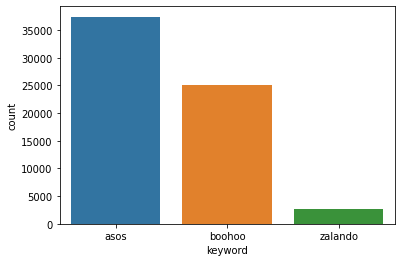

In [12]:
sns.countplot(x="keyword", data=eng_df, order=['asos', 'boohoo', 'zalando'])

# Functions for cleaning tweets

In [95]:
def clean_complete(tweet):
    """
    tweet: pandas series
    prepares tweets complete cleaning for further lemmatization and dering embeddings
    """
    pat = r"(\\n)|(@\w*)|((www\.[^\s]+)|(https?://[^\s]+))"
    tweet = tweet.str.replace(pat, '')

    #remove repeated charachters
    
    #replace emoticons with words
    #SMILEYS = {":-(":"sad", ":‑)":"smiley", ":-P":"playfullness", ":-/":'confused'}

    tweet = tweet.str.replace(r':-\)', ' smile')
    tweet = tweet.str.replace(r':-\(', ' sad')
    tweet = tweet.str.replace(r':-\/', ' confused')
    tweet = tweet.str.replace(r':-P', ' playfullness')

    #delete \xa
    tweet = tweet.str.replace('\xa0', '')

    tweet = tweet.str.replace('&amp', '')
    tweet = tweet.str.replace('\n', '')
    tweet = tweet.str.replace('"', '')
    #to lower case
    tweet = tweet.str.lower()

    #covert hashtags to the normal text
    tweet = tweet.str.replace(r'#([^\s]+)', r'\1')

    #delete numbers
    tweet = [strip_numeric(c) for c in tweet]

    #replacing emojies with descriptions '❤️-> red heart'
    tweet = [demoji.replace_with_desc(c, ' ') for c in tweet]

    #delete punctuation
    tweet = [strip_punctuation(c) for c in tweet]

    #remove stop words
    tweet = [remove_stopwords(c) for c in tweet]

    #remove short words
    tweet = [strip_short(c) for c in tweet]

    #remove mult whitespaces
    tweet = [strip_multiple_whitespaces(c) for c in tweet]
    return tweet


In [57]:
def clean_vader(tweet):
    """
    tweet: pandas series
    prepares tweets for vader sentiment analysis
    """

    pat = r"(\\n)|(@\w*)|((www\.[^\s]+)|(https?://[^\s]+))"
    tweet = tweet.str.replace(pat, '')

    #replace emoticons with words
    #SMILEYS = {":-(":"sad", ":‑)":"smiley", ":-P":"playfullness", ":-/":'confused'}

    #tweet = tweet.str.replace(r':-\)', ' smile')
    #tweet = tweet.str.replace(r':-\(', ' sad')
    #tweet = tweet.str.replace(r':-\/', ' confused')
    #tweet = tweet.str.replace(r':-P', ' playfullness')

    #delete \xa
    tweet = tweet.str.replace('\xa0', '')

    tweet = tweet.str.replace('&amp', '')
    tweet = tweet.str.replace('\n', '')

    #to lower case
    #tweet = tweet.str.lower()

    #covert hashtags to the normal text
    tweet = tweet.str.replace(r'#([^\s]+)', r'\1')

    #delete numbers
    tweet = [strip_numeric(c) for c in tweet]

    #replacing emojies with descriptions '❤️-> red heart'
    #tweet = [demoji.replace_with_desc(c, ' ') for c in tweet]

    #delete punctuation
    #tweet = [strip_punctuation(c) for c in tweet]

    #remove stop words
    #tweet = [remove_stopwords(c) for c in tweet]

    #remove short words
    tweet = [strip_short(c) for c in tweet]

    #remove mult whitespaces
    tweet = [strip_multiple_whitespaces(c) for c in tweet]
    return tweet


# Applying cleaning

In [72]:
eng_df['clean'] = clean_complete(eng_df.tweet)
eng_df.head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:74: FutureWarning: The default value of regex will change from True to False in a future version.


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,@zalando,en,money owe
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,@zalando,en,problem starts adidas selling latex websites
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,@zalando,en,welcome world sneering disdain


In [73]:
eng_df['clean_vader'] = clean_vader(eng_df.tweet)
eng_df.head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:102: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:122: FutureWarning: The default value of regex will change from True to False in a future version.


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,@zalando,en,money owe,give money you owe me!!!
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,@zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,@zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!


In [74]:
#check the results
print(eng_df.tweet[878])
print(eng_df.clean[878])
print(eng_df.clean_vader[878])

Absolutely disgraceful that @ASOS @ASOS_HeretoHelp are refusing to help with refund issues on @Topshop orders. Buyers beware! https://t.co/zSz78WnvOp
absolutely disgraceful refusing help refund issues orders buyers beware
Absolutely disgraceful that are refusing help with refund issues orders. Buyers beware!


# get sentiment analysis

In [75]:
#Vater sentiment analyzer
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
sid_obj = SentimentIntensityAnalyzer()
eng_df['compound'] = [sid_obj.polarity_scores(c)['compound'] for c in eng_df['clean_vader']]

In [76]:
print(eng_df[['clean_vader', 'compound']].describe())

           compound
count  64432.000000
mean       0.129331
std        0.463488
min       -0.999900
25%        0.000000
50%        0.000000
75%        0.493900
max        0.999900


# Testing cleaning function 
shoud not be executed if you want to reproduce the dataset

In [7]:
#testing
#delete links, users
pat = r"(\\n)|(@\w*)|((https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}))"
eng_df.tweet = eng_df.tweet.str.replace(pat, '')
eng_df.tweet[3140]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


'Hey ! I ordered some products from your web shop. All items had “fast delivery” and are supposed to arrive today. Unfortunately you have not even shipped the parcel to me. This is not the first time that this happens.\n:-('

In [ ]:
#remove chars more than twice
#str.replace( /(.)\1{2,}/g, '$1$1' )

In [8]:

#testing
# #replace emoticons with words
#SMILEYS = {":-(":"sad", ":‑)":"smiley", ":-P":"playfullness", ":-/":'confused'}

eng_df.tweet = eng_df.tweet.str.replace(r':-\)', ' smile')
eng_df.tweet = eng_df.tweet.str.replace(r':-\(', ' sad')
eng_df.tweet = eng_df.tweet.str.replace(r':-\/', ' confused')
eng_df.tweet = eng_df.tweet.str.replace(r':-P', ' playfullness')

eng_df.tweet[3140]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


'Hey ! I ordered some products from your web shop. All items had “fast delivery” and are supposed to arrive today. Unfortunately you have not even shipped the parcel to me. This is not the first time that this happens.\n sad'

In [10]:
#testing#delete \xa
eng_df.tweet = eng_df.tweet.str.replace('\xa0', '')
eng_df.tweet[0]

'Who and what has made our greener retailing tracker this week? Step forward,, ,,, ,, ,,,, and '

In [11]:
#testing
eng_df.tweet = eng_df.tweet.str.replace('&amp', '')
eng_df.tweet = eng_df.tweet.str.replace('\n', '')
eng_df.tweet[3140]


'Hey ! I ordered some products from your web shop. All items had “fast delivery” and are supposed to arrive today. Unfortunately you have not even shipped the parcel to me. This is not the first time that this happens. sad'

In [12]:
#testing#to lower case
eng_df.tweet = eng_df.tweet.str.lower()
eng_df.tweet[3140]

'hey ! i ordered some products from your web shop. all items had “fast delivery” and are supposed to arrive today. unfortunately you have not even shipped the parcel to me. this is not the first time that this happens. sad'

In [13]:
#testing#covert hashtags to the normal text
eng_df.tweet = eng_df.tweet.str.replace(r'#([^\s]+)', r'\1')
eng_df.tweet[3140]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


'hey ! i ordered some products from your web shop. all items had “fast delivery” and are supposed to arrive today. unfortunately you have not even shipped the parcel to me. this is not the first time that this happens. sad'

In [15]:
#testing#delete numbers
eng_df.tweet = [strip_numeric(c) for c in eng_df.tweet]
eng_df.tweet[7]

'  zalando thinks im big and/or pregnant and suggests me lovely maternity clothes ❤️❤️❤️❤️❤️❤️❤️ thanks i love it ❤️❤️❤️❤️'

In [16]:
#testing#replacing emojies with descriptions '❤️-> red heart'
eng_df.tweet = [demoji.replace_with_desc(c, ' ') for c in eng_df.tweet]
eng_df.tweet[9]

"new  redezign for circularity pilot product is out now! all products of the pilot are equipped with our  a digital tag which saves all product data. once scanned, you are able to discover the product's history through a digital product site  down arrow  recycling symbol  "

In [18]:
##testing delete punctuation
eng_df.tweet = [strip_punctuation(c) for c in eng_df.tweet]
eng_df.tweet[7]

'  zalando thinks im big and or pregnant and suggests me lovely maternity clothes  red heart  red heart  red heart  red heart  red heart  red heart  red heart  thanks i love it  red heart  red heart  red heart  red heart '

In [19]:
#testing
eng_df.tweet = [remove_stopwords(c) for c in eng_df.tweet]
eng_df.tweet[7]

'zalando thinks im big pregnant suggests lovely maternity clothes red heart red heart red heart red heart red heart red heart red heart thanks love red heart red heart red heart red heart'

In [21]:
#testin
eng_df.tweet = [strip_multiple_whitespaces(c) for c in eng_df.tweet]
eng_df.tweet[7]

'zalando thinks big pregnant suggests lovely maternity clothes red heart red heart red heart red heart red heart red heart red heart thanks love red heart red heart red heart red heart'

# Lemmatization

In [47]:
def lemmatize(tweet):
    '''
    tweet: pandas series
    should be applied on the cleaned tweets to transform words to their initial base form.
    For example: suggests -> suggest, deliveries -> delivery
    '''
    nlp = spacy.load("en_core_web_sm")
    tweet = [nlp(c) for c in tweet]
    tweet = [" ".join([token.lemma_ for token in t]) for t in tweet]
    return tweet

In [48]:
nlp = spacy.load("en_core_web_sm")

In [77]:
eng_df['lem'] = [nlp(c) for c in eng_df.clean]

In [94]:
eng_df.lem[868]

asos stands “as seen screen” exploding head exploding head

In [78]:
eng_df['lemma'] = [" ".join([token.lemma_ for token in t]) for t in eng_df.lem]
eng_df.lemma[7]

'fyi absolutely useless select puntoposte shipping apparently way know location choose available happen automatically ship refund tell order'

In [86]:
eng_df.head()

,level_0,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,language,keyword,favorite_count,in_reply_to_status_id,clean,clean_vader,compound,lem,lemma
0,383,0,1323291682000000000,133,GreenerRetail,Who and what has made our greener retailing tr...,0,Planet Earth,05-Mar-2021,70,False,en,@zalando,NaN,NaN,greener retailing tracker week step forward an...,Who and what has made our greener retailing tr...,0.0000,"(greener, retailing, tracker, week, step, forw...",greener retailing tracker week step forward an...
1,384,1,1259761930000000000,1,fattybabycat,".@Zalando offers nothing more than scripted, c...",0,,05-Mar-2021,0,False,en,@zalando,NaN,NaN,offers scripted cordial replies instead actual...,"offers nothing more than scripted, cordial rep...",-0.9060,"(offers, scripted, cordial, replies, instead, ...",offer script cordial reply instead actual cust...
2,385,2,835467350200000128,2296,piotrkarwatka,We've got a great talk with Fabian Wesner on h...,0,"Wrocław, Polska",05-Mar-2021,1347,False,en,@zalando,NaN,NaN,got great talk fabian wesner new venture roq t...,We've got great talk with Fabian Wesner his ne...,0.6249,"(got, great, talk, fabian, wesner, new, ventur...",get great talk fabian wesner new venture roq t...
3,386,3,58485935,114,MissyDawn27586,@Zalando recieved wrong item... don’t know how...,0,,05-Mar-2021,27,False,en,@zalando,NaN,NaN,recieved wrong item don’t know item cheaper it...,recieved wrong item... don’t know how about th...,-0.4767,"(recieved, wrong, item, do, n’t, know, item, c...",recieve wrong item do n’t know item cheap item...
4,387,4,1059339104000000000,11725,CarolCooney7,@DrewLawDesign @Zalando have sent me a few de...,0,,05-Mar-2021,457,False,en,@zalando,NaN,NaN,sent deliveries paper bags,have sent few deliveries paper bags now.,0.0000,"(sent, deliveries, paper, bags)",send delivery paper bag


# Data description
- tweet: initial tweet as it was downloaded from API
- clean: tweet cleaned completely from punctuation, emojies, emoticons, stopwords, special characters, users, hashtags, links
- clean_vader: tweet partly cleaned, saving punctuation, emoticons, emojies for using library Vader to get the sentiment of the tweet
- compouns: from -1 (negative) to 1 (positive), 0 - neutral, a tweet sentiment derived from Vader library
- lem: intermidiate step before lemmatization
- lemma: lemmatized words (sent -> send)

# Save the dataframe

In [79]:
pickle.dump(eng_df, open(r'.\data_n_models\eng_df_labelled.pkl', 'wb'))